The goal of the project is to understand this dataset, get some insights from it, and finally to train different model that can predict selling price of used cars and evaluate the best model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [ ]:
car_price = pd.read_csv('/content/Used_Car_Data.csv')

In [ ]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_price.shape

(301, 9)

In [ ]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_price.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_price.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


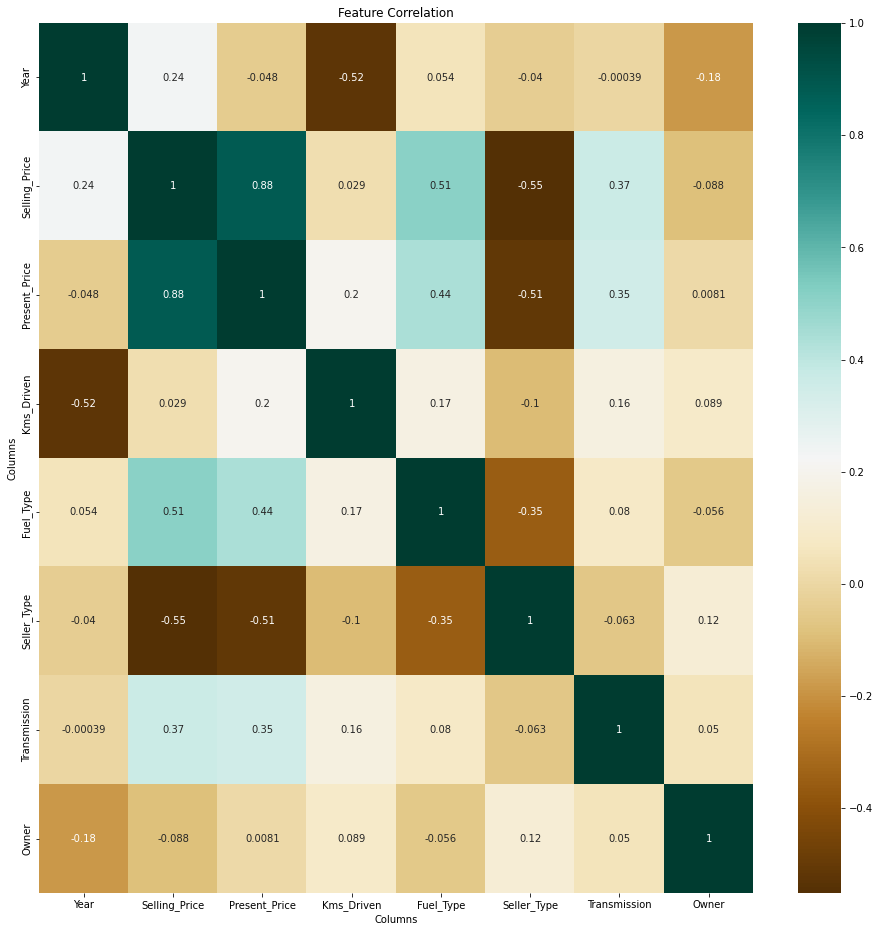

In [ ]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(car_price.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

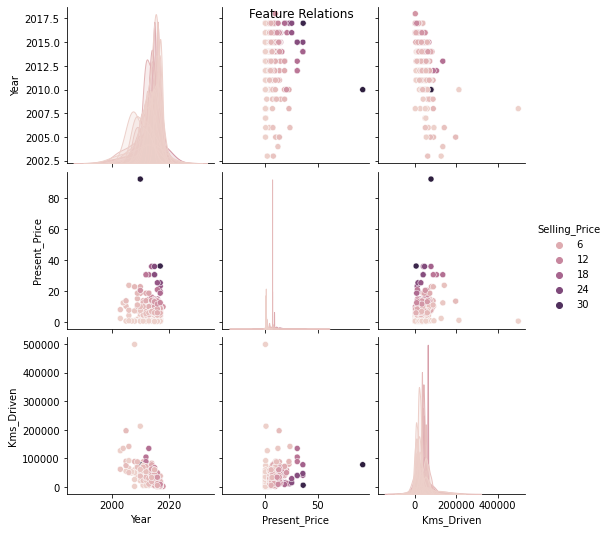

In [ ]:
car = sns.pairplot(car_price[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']], hue='Selling_Price')
car.fig.suptitle('Feature Relations')
plt.show()

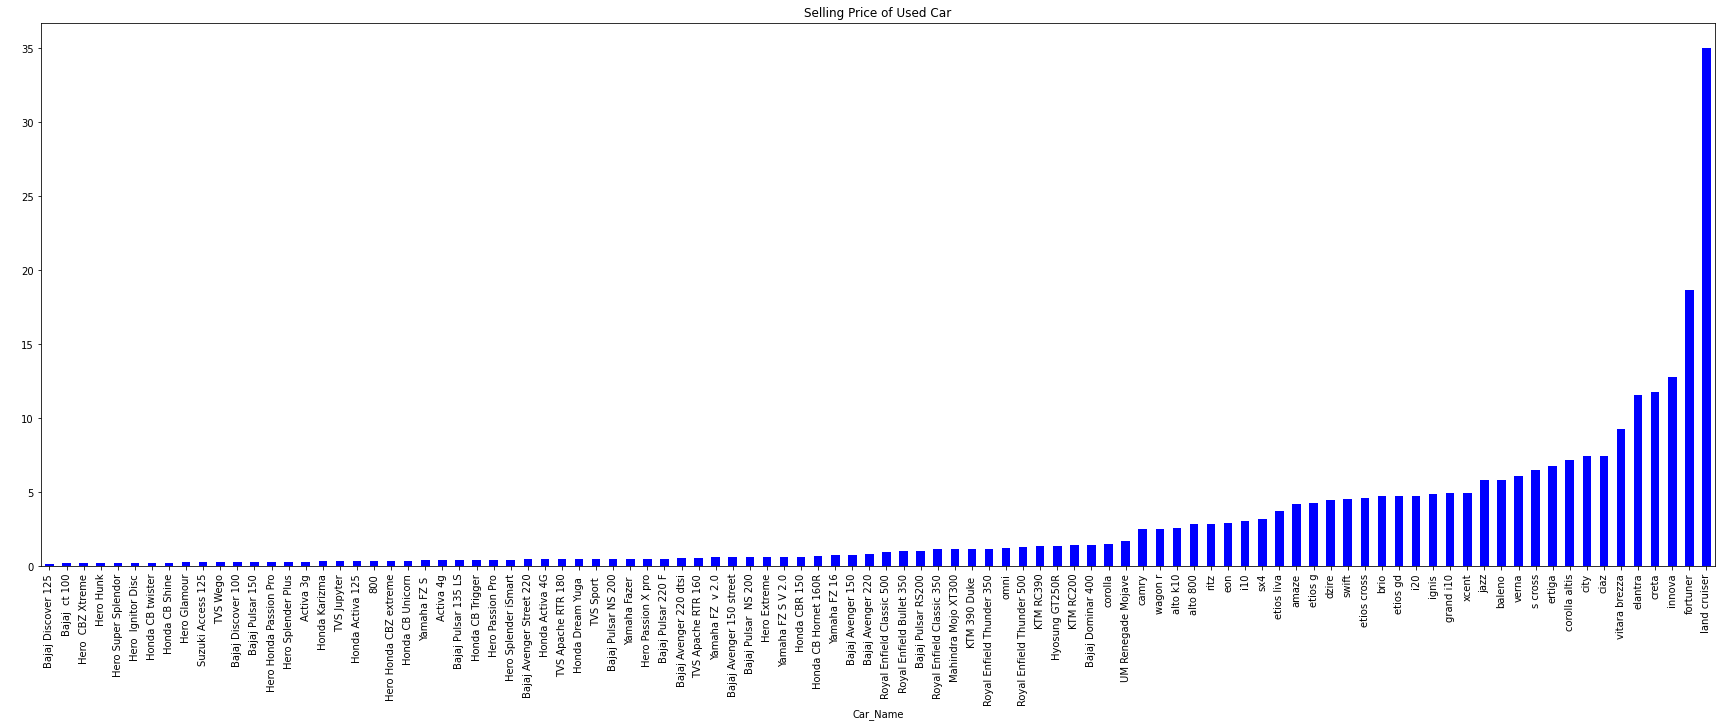

In [ ]:
fig = plt.figure(figsize=(30, 10))
car_price.groupby('Car_Name')['Selling_Price'].mean().sort_values().plot(kind='bar', color='blue')
plt.title('Selling Price of Used Car')
plt.xlabel("Car_Name")
plt.ylabel(" ")
plt.show()

In [ ]:
X = car_price.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_price['Selling_Price']

Splitting the dataset into 90% traning set and 10% test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

#Linear regression:
Linear regression nalysis is used to predict the value of a variable based on the value of another variable.
In the linear regression section, 


Step 1: Train the model

Step 2: Predicting training set

Step 3: Checking R-squared value, Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step1-4) for `test set`, as well.

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, Y_train)

LinearRegression()

In [ ]:
LR_Training_Prediction = LR.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, LR_Training_Prediction)

In [ ]:
MAE =  metrics.mean_absolute_error(Y_train, LR_Training_Prediction)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_train, LR_Training_Prediction))

In [ ]:
print("R squared Error : ", error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8799451660493711
Mean Absolute Error:  1.2166174093911273
Mean Squared Error:  1.8052785999144527


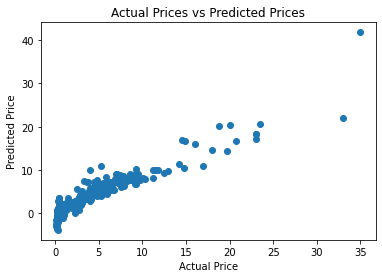

In [ ]:
plt.scatter(Y_train, LR_Training_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
LR_Test_Prediction = LR.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, LR_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, LR_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, LR_Test_Prediction))

In [ ]:
print("R squared Error : ", error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8365766715027051
Mean Absolute Error:  1.1516382156613783
Mean Squared Error:  1.4663321311979867


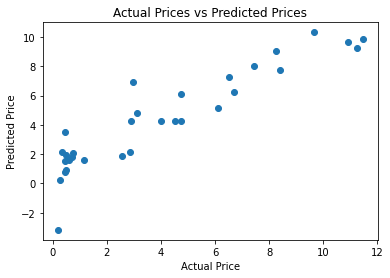

In [ ]:
plt.scatter(Y_test, LR_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
Lasso_model = Lasso()

In [ ]:
Lasso_model.fit(X_train, Y_train)

Lasso()

In [ ]:
Lasso_Training_Prediction = Lasso_model.predict(X_train)

In [ ]:
Lasso_error_score = metrics.r2_score(Y_train, Lasso_Training_Prediction)
MAE =  metrics.mean_absolute_error(Y_train, Lasso_Training_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train, Lasso_Training_Prediction))

In [ ]:
print("R squared Error : ", error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8365766715027051
Mean Absolute Error:  1.2863097696916528
Mean Squared Error:  2.065858410155508


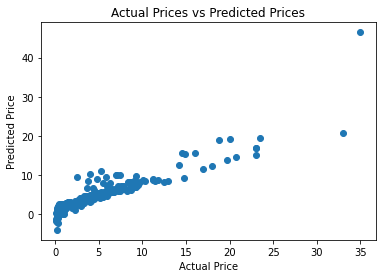

In [ ]:
plt.scatter(Y_train, Lasso_Training_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Lasso Regression:
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for `Least Absolute Shrinkage and Selection Operator`.

Lasso regression performs `L1 regularization`, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

###In the lasso regression section, 

Step 1: Train the model

Step 2: Predicting training set

Step 3: Checked R-squared value(r2), Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step 1- 4) for `test set` as well.

In [ ]:
Lasso_Test_Prediction = Lasso_model.predict(X_test)

In [ ]:
Lasso_error_score = metrics.r2_score(Y_test, Lasso_Test_Prediction)

In [ ]:
Lasso_error_score = metrics.r2_score(Y_test, Lasso_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, Lasso_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Lasso_Test_Prediction))

In [ ]:
print("R squared Error : ", error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8365766715027051
Mean Absolute Error:  1.0507413774170433
Mean Squared Error:  1.3031973759552113


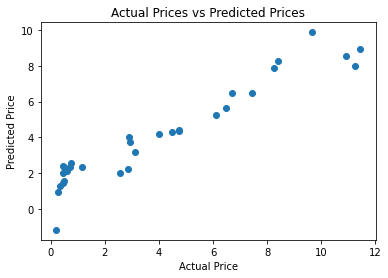

In [ ]:
plt.scatter(Y_test, Lasso_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Random Forest Regressor

Random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


###In the Random Forest regression section, 

Step 1: Train the model

Step 2: Predicting training set

Step 3: Checked R-squared value(r2), Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step 1- 4) for `test set` as well.

In [ ]:
RF = RandomForestRegressor(random_state=101, n_estimators=200)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [ ]:
RF_Train_Prediction = RF.predict(X_train)

In [ ]:
RF_train_error_score = metrics.r2_score(Y_train, RF_Train_Prediction)
MAE =  metrics.mean_absolute_error(Y_train, RF_Train_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train, RF_Train_Prediction))

In [ ]:
print("R squared Error : ", RF_train_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.9876232703233567
Mean Absolute Error:  0.23644074074074045
Mean Squared Error:  0.5796386830188712


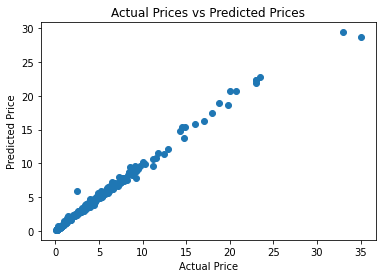

In [ ]:
plt.scatter(Y_train, RF_Train_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
RF_Test_Prediction = RF.predict(X_test)

In [ ]:
RF_test_error_score = metrics.r2_score(Y_test, RF_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, RF_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, RF_Test_Prediction))

In [ ]:
print("R squared Error : ", RF_test_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.9764114398469631
Mean Absolute Error:  0.36192258064516186
Mean Squared Error:  0.557090870707649


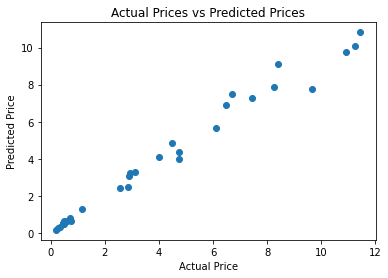

In [ ]:
plt.scatter(Y_test, RF_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#SVM
Support Vector Regression(SVM)

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples. For large datasets consider using LinearSVR or SGDRegressor instead, possibly after a Nystroem transformer.

###In the SVM regression section, 

Step 1: Train the model

Step 2: Predicting training set

Step 3: Checked R-squared value(r2), Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step 1- 4) for `test set` as well.

In [ ]:
SVM = SVR(kernel='rbf')

In [ ]:
SVM.fit(X_train, Y_train)

SVR()

In [ ]:
SVM_Train_Prediction = SVM.predict(X_train)

In [ ]:
SVM_train_error_score = metrics.r2_score(Y_train, SVM_Train_Prediction)
MAE =  metrics.mean_absolute_error(Y_train, SVM_Train_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train, SVM_Train_Prediction))

In [ ]:
print("R squared Error : ", SVM_train_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  -0.07757296966916716
Mean Absolute Error:  3.2358353204822174
Mean Squared Error:  5.408511440322602


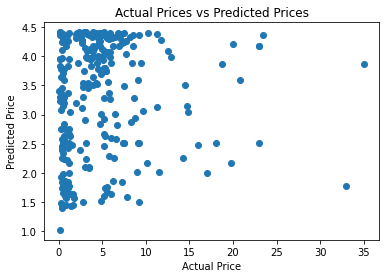

In [ ]:
plt.scatter(Y_train, SVM_Train_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
SVM_Test_Prediction = SVM.predict(X_test)

In [ ]:
SVM_test_error_score = metrics.r2_score(Y_test, SVM_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, SVM_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, SVM_Test_Prediction))

In [ ]:
print("R squared Error : ", SVM_test_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.10854097603356638
Mean Absolute Error:  2.679286602064489
Mean Squared Error:  3.42472747682601


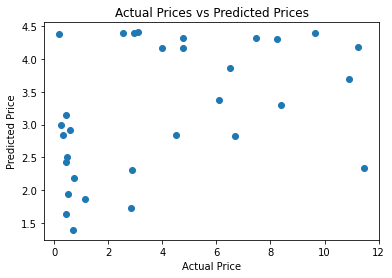

In [ ]:
plt.scatter(Y_test, SVM_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Ridge Regression

Linear least squares with L2 regularization.
Minimizes the objective function,
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as `Ridge Regression or Tikhonov regularization`. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).


###In the Ridge regression section, 

Step 1: Train the model

Step 2: Predicting training set

Step 3: Checked R-squared value(r2), Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step 1- 4) for `test set` as well.

In [ ]:
RR = Ridge(alpha=0.01)

In [ ]:
RR.fit(X_train, Y_train)

Ridge(alpha=0.01)

In [ ]:
RR_Train_Prediction = RR.predict(X_train)

In [ ]:
RR_train_error_score = metrics.r2_score(Y_train, RR_Train_Prediction)
MAE =  metrics.mean_absolute_error(Y_train, RR_Train_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train, RR_Train_Prediction))

In [ ]:
print("R squared Error : ", RR_train_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8799451626775093
Mean Absolute Error:  1.2165770436195191
Mean Squared Error:  1.805278625265993


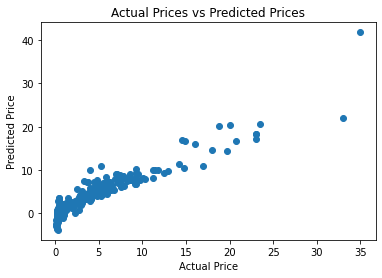

In [ ]:
plt.scatter(Y_train, RR_Train_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
RR_Test_Prediction = RR.predict(X_test)

In [ ]:
RR_test_error_score = metrics.r2_score(Y_test, RR_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, RR_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, RR_Test_Prediction))

In [ ]:
print("R squared Error : ", RR_test_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.8366139203040408
Mean Absolute Error:  1.1515492356842683
Mean Squared Error:  1.4661650123802068


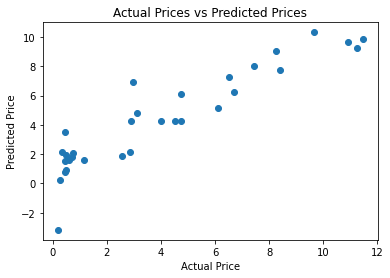

In [ ]:
plt.scatter(Y_test, RR_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Decision Tree Regression

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.


###In the Decision Tree regression section, 

Step 1: Train the model

Step 2: Predicting training set

Step 3: Checked R-squared value(r2), Mean Absolute Error(MAE), Root Mean Squared Error(RMSE)

Step 4: Showing the measured values(R2, MAE, RMSE)

Step 5: Visualize the results with a graph

Step 6: We have done the same thing(step 1- 4) for `test set` as well.

In [ ]:
DTR = DecisionTreeRegressor(random_state = 42)

In [ ]:
DTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
DTR_Test_Prediction = DTR.predict(X_test)

In [ ]:
DTR_test_error_score = metrics.r2_score(Y_test, DTR_Test_Prediction)
MAE =  metrics.mean_absolute_error(Y_test, DTR_Test_Prediction)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, DTR_Test_Prediction))

In [ ]:
print("R squared Error : ", DTR_test_error_score)
print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", RMSE)

R squared Error :  0.9525784699755273
Mean Absolute Error:  0.4600000000000001
Mean Squared Error:  0.7898836173970555


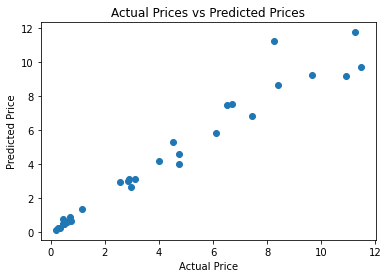

In [ ]:
plt.scatter(Y_test, DTR_Test_Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#K-Fold Cross validation
K-fold cross validation works by breaking your training data into K equal-sized “folds.” It iterates through each fold, treating that fold as holdout data, training a model on all the other K-1 folds, and evaluating the model’s performance on the one holdout fold. This results in having K different models, each with an out of sample model accuracy score on a different holdout set. The average of these K models’ out-of-sample scores is the model’s cross-validation score.

Cross validation is useful because it provides a lower-variance estimate of the model’s true out of sample score than if you had only used a single train-test split.

Here we initialize a random forest classifier and feed it to sklearn’s cross_validate function. This function receives the model and its training data, the array or dataframe column of target values, and the number of folds for it to cross validate over (the number of models it will train).

The cross validation object stores the out of sample accuracy of each of its trained models. Taking the average of these K out-of-sample scores gives you the model’s cross-validation accuracy, a low-variance estimate of how the model will perform on unseen data.

In [ ]:
RF = RandomForestRegressor(random_state = 101, n_estimators=200)
cv = cross_validate(RF, X_train, Y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.94176548 0.85206872 0.94663126 0.83749255 0.96736046]
0.9090636932370257


In [ ]:
RF = RandomForestRegressor(random_state = 101, n_estimators=200)
cv = cross_validate(RF, X_test, Y_test, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.81648682 0.88028219 0.93556316 0.94139044 0.94745927]
0.9042363765242026


In [ ]:
DTR = DecisionTreeRegressor(random_state = 42)
cv = cross_validate(DTR, X_train, Y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.92571953 0.82121645 0.93717637 0.73625436 0.91403304]
0.8668799516080951


In [ ]:
DTR = DecisionTreeRegressor(random_state = 42)
cv = cross_validate(DTR, X_test, Y_test, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.646284   0.86324549 0.91372802 0.88813674 0.90611327]
0.8435015057272068


In conclusion, by using K-Fold Cross validation, we found that `Random Forest Regression` and `Decision Tree` gives us the better output for this "Used Car dataset", So, we can say that this two model is best model for this dataset.